# Day 4: Repose Record
You've sneaked into another supply closet - this time, it's across from the prototype suit manufacturing lab. You need to sneak inside and fix the issues with the suit, but there's a guard stationed outside the lab, so this is as close as you can safely get.

As you search the closet for anything that might help, you discover that you're not the first person to want to sneak in. Covering the walls, someone has spent an hour starting every midnight for the past few months secretly observing this guard post! They've been writing down the ID of the one guard on duty that night - the Elves seem to have decided that one guard was enough for the overnight shift - as well as when they fall asleep or wake up while at their post (your puzzle input).

For example, consider the following records, which have already been organized into chronological order:
```
[1518-11-01 00:00] Guard #10 begins shift
[1518-11-01 00:05] falls asleep
[1518-11-01 00:25] wakes up
[1518-11-01 00:30] falls asleep
[1518-11-01 00:55] wakes up
[1518-11-01 23:58] Guard #99 begins shift
[1518-11-02 00:40] falls asleep
[1518-11-02 00:50] wakes up
[1518-11-03 00:05] Guard #10 begins shift
[1518-11-03 00:24] falls asleep
[1518-11-03 00:29] wakes up
[1518-11-04 00:02] Guard #99 begins shift
[1518-11-04 00:36] falls asleep
[1518-11-04 00:46] wakes up
[1518-11-05 00:03] Guard #99 begins shift
[1518-11-05 00:45] falls asleep
[1518-11-05 00:55] wakes up
```
Timestamps are written using year-month-day hour:minute format. The guard falling asleep or waking up is always the one whose shift most recently started. Because all asleep/awake times are during the midnight hour (00:00 - 00:59), only the minute portion (00 - 59) is relevant for those events.

Visually, these records show that the guards are asleep at these times:
```
Date   ID   Minute
            000000000011111111112222222222333333333344444444445555555555
            012345678901234567890123456789012345678901234567890123456789
11-01  #10  .....####################.....#########################.....
11-02  #99  ........................................##########..........
11-03  #10  ........................#####...............................
11-04  #99  ....................................##########..............
11-05  #99  .............................................##########.....
```
The columns are Date, which shows the month-day portion of the relevant day; ID, which shows the guard on duty that day; and Minute, which shows the minutes during which the guard was asleep within the midnight hour. (The Minute column's header shows the minute's ten's digit in the first row and the one's digit in the second row.) Awake is shown as ., and asleep is shown as #.

Note that guards count as asleep on the minute they fall asleep, and they count as awake on the minute they wake up. For example, because Guard #10 wakes up at 00:25 on 1518-11-01, minute 25 is marked as awake.

If you can figure out the guard most likely to be asleep at a specific time, you might be able to trick that guard into working tonight so you can have the best chance of sneaking in. You have two strategies for choosing the best guard/minute combination.

Strategy 1: Find the guard that has the most minutes asleep. What minute does that guard spend asleep the most?

In the example above, Guard #10 spent the most minutes asleep, a total of 50 minutes (20+25+5), while Guard #99 only slept for a total of 30 minutes (10+10+10). Guard #10 was asleep most during minute 24 (on two days, whereas any other minute the guard was asleep was only seen on one day).

While this example listed the entries in chronological order, your entries are in the order you found them. You'll need to organize them before they can be analyzed.

What is the ID of the guard you chose multiplied by the minute you chose?

(In the above example, the answer would be `10 * 24 = 240`.)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

We'll load and split the data. Small trick we use here, as python does not eat 1518. Soooo, we'll ignore millenium and century and hope for the best. Hic sunt dragones.

In [2]:
with open("day4.txt") as f:
    content = f.readlines()
content = pd.DataFrame([x[3:].strip().split("] ") for x in content], columns=["Time", "Action"])
content.head()

,Time,Action
0,18-06-23 00:43,wakes up
1,18-06-01 00:26,wakes up
2,18-08-29 00:02,falls asleep
3,18-03-06 00:02,Guard #1783 begins shift
4,18-04-28 00:01,Guard #1553 begins shift


Everything's better with datetime.

In [3]:
content['Time'] = pd.to_datetime(content['Time'], format='%y-%m-%d %H:%M')
content.head()

,Time,Action
0,2018-06-23 00:43:00,wakes up
1,2018-06-01 00:26:00,wakes up
2,2018-08-29 00:02:00,falls asleep
3,2018-03-06 00:02:00,Guard #1783 begins shift
4,2018-04-28 00:01:00,Guard #1553 begins shift


And some sorting.

In [4]:
content = content.sort_values("Time")
content.head()

,Time,Action
625,2018-02-20 23:47:00,Guard #101 begins shift
390,2018-02-21 00:03:00,falls asleep
684,2018-02-21 00:45:00,wakes up
487,2018-02-22 00:02:00,Guard #827 begins shift
238,2018-02-22 00:38:00,falls asleep


Now I'll push some characters around to get the Guard ID out. That makes it much better. Also, we'll do a nice difference, so we can get a time difference to work with.

In [5]:
guard = []
for x in content["Action"]:
    q = x.split(' ')[1]
    if '#' in q:
        p = int(q[1:])
    guard.append(p)
content["Guard"] = guard
content.head()

,Time,Action,Guard
625,2018-02-20 23:47:00,Guard #101 begins shift,101
390,2018-02-21 00:03:00,falls asleep,101
684,2018-02-21 00:45:00,wakes up,101
487,2018-02-22 00:02:00,Guard #827 begins shift,827
238,2018-02-22 00:38:00,falls asleep,827


In [6]:
content["Time_Diff"] = content["Time"]-content["Time"].shift(1)
content.head()

,Time,Action,Guard,Time_Diff
625,2018-02-20 23:47:00,Guard #101 begins shift,101,NaT
390,2018-02-21 00:03:00,falls asleep,101,00:16:00
684,2018-02-21 00:45:00,wakes up,101,00:42:00
487,2018-02-22 00:02:00,Guard #827 begins shift,827,23:17:00
238,2018-02-22 00:38:00,falls asleep,827,00:36:00


Time to try out Pivot Tables!

We can let Pandas just figure out the sums for all the Guards.

In [7]:
df = content[content["Action"] == "wakes up"].drop(["Time","Action"],axis=1)
table = pd.pivot_table(df, values='Time_Diff', columns=['Guard'], aggfunc=np.sum).T
table

,Time_Diff
Guard,
101,04:34:00
283,07:40:00
349,04:15:00
449,07:35:00
691,07:29:00
751,03:17:00
827,06:05:00
1193,05:30:00
1553,07:13:00


In [8]:
table.sort_values('Time_Diff')

,Time_Diff
Guard,
2383,02:39:00
1973,03:16:00
751,03:17:00
2857,03:21:00
1723,03:35:00
3499,03:38:00
1669,04:04:00
349,04:15:00
101,04:34:00


Hello Mister 283. We have to have a talk. That job is amazing 8 hours of sleeping on the job. So we'll extract a table with the sleepy wakey times.

In [9]:
sleepy_guard = content[content["Guard"] == 283]
sleepy_guard = sleepy_guard[~content["Action"].str.startswith("Guard")]
sleepy_guard.head()

C:\tools\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,Time,Action,Guard,Time_Diff
479,2018-03-08 00:09:00,falls asleep,283,00:09:00
895,2018-03-08 00:57:00,wakes up,283,00:48:00
55,2018-03-28 00:43:00,falls asleep,283,00:40:00
130,2018-03-28 00:59:00,wakes up,283,00:16:00
550,2018-03-30 00:31:00,falls asleep,283,00:30:00


Sooo, iterate over rows and just add that jazz up and throw in a plot for good measure!

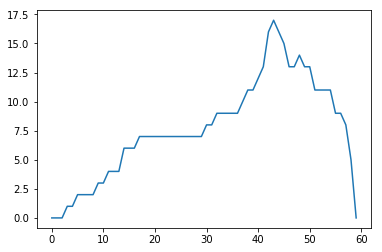

In [10]:
counter = np.zeros(60)
flippy = True
for rows in sleepy_guard["Time"]:
    if flippy:
        start = rows.minute
    else:
        counter[start:rows.minute] += 1
    flippy = np.invert(flippy)
plt.plot(counter)


In [11]:
np.argmax(counter)

43

In [12]:
43*283

12169

## Part Two
Strategy 2: Of all guards, which guard is most frequently asleep on the same minute?

In the example above, Guard #99 spent minute 45 asleep more than any other guard or minute - three times in total. (In all other cases, any guard spent any minute asleep at most twice.)

What is the ID of the guard you chose multiplied by the minute you chose? (In the above example, the answer would be 99 * 45 = 4455.)

In [13]:
guards = list(pd.unique(content["Guard"]))

C:\tools\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


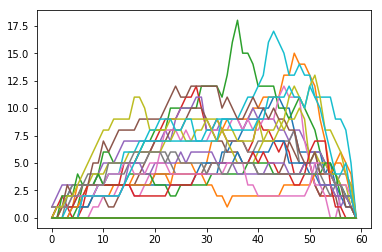

In [14]:
counter = np.zeros([60,23])
row_count = 0

sleep_content = content[~content["Action"].str.startswith("Guard")]

for guard in guards:
    flippy = True
    all_guard = sleep_content[content["Guard"] == guard]
    for rows in all_guard["Time"]:
        if flippy:
            start = rows.minute
        else:
            counter[start:rows.minute,row_count] += 1
        flippy = np.invert(flippy)
    row_count += 1
plt.plot(counter)


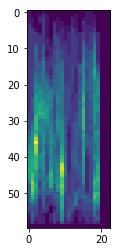

In [15]:
plt.imshow(counter)

Clearly... No. Nothing is clear from this one.

In [16]:
 np.unravel_index(np.argmax(counter, axis=None), counter.shape)

(36, 2)

In [17]:
guards[2]

449

In [18]:
36*449

16164